# TEST Version with the internal version of catalogs, etc.
# NOT the public version of "Using the AGN / QSO Summary Catalog MASKBITS"
##### Authors: (Please add names) B. Canning, S. Juneau, M. Mezcua, R. Pucha, R. Alfarsy, S. Behera, G. Suidek, B. Floyd, S. Srinivas,  

This is an example notebook which demonstrates use cases fo the AGN/QSO summary catalog.

See AGNQSO_summary_cat.ipynb for credits

### 1) First let's import some stuff!

In [1]:
# Numpy
import numpy as np
# Plotting stuff and suppressing boring warnings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')

# Get the GQP code
import sys
# Set the path where the py scripts are
sys.path.append("../py/")
import set_agn_masksDESI
from set_agn_masksDESI import get_agn_maskbits

# Below: delete if not needed (TO DO)
#import yaml
#import pandas as pd
#import os.path
#import fitsio

# Import Astropy libraries - useful for many astronomy related function
from astropy.table import Table #, join, Column
from astropy.io import fits

# DESI modules
#from desispec.zcatalog import find_primary_spectra, create_summary_catalog  # at NERSC needs DESI master
#from desitarget.targetmask import desi_mask, bgs_mask, scnd_mask      # For the main survey
#from desiutil.bitmask import BitMask

#https://www.legacysurvey.org/viewer?ra=10.1572&dec=-0.3316&layer=ls-dr9&zoom=16

settings = {
    'font.size':16,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True,
    'axes.labelsize':18
}
#    'xlabel.fontsize':18,
#    'ylabel.fontsize':18
#    }

plt.rcParams.update(**settings)

### 2) Now we are ready to open the catalog.

The internal GQP drive at NERSC is

        /global/cfs/cdirs/desi/science/gqp/

From there we can find the 'agncatalog' folder and follow the link on to 'catalog'

In [2]:
def return_catdir(location='nersc'):

    dl_path = '~/data/DESI/science/gqp/agncatalog/catalog/'
    nersc_path = '/global/cfs/cdirs/desi/science/gqp/agncatalog/'

    if location=='datalab':
        return(dl_path)
    else:
        return(nersc_path)  #default

In [4]:
catdir = return_catdir(location='nersc')

# Open the catalog
#agn_hdul = fits.open(f'{catdir}agnqso_sum_v1.4.fits', format='fits')
#agn_hdul.info()

# testing EDR or DR1
#agn_hdul = fits.open(f'{catdir}catalog/agnqso_sum_v1.9.fits', format='fits')  #EDR
agn_hdul = fits.open(f'{catdir}dr1/v1.0/agnqso_desi.fits', format='fits')  #DR1
agn_hdul.info()

Filename: /global/cfs/cdirs/desi/science/gqp/agncatalog/dr1/v1.0/agnqso_desi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  AGNCAT        1 BinTableHDU     89   17995599R x 36C   [K, 7A, 6A, J, D, D, K, 6A, K, K, K, J, D, D, K, D, D, D, I, E, L, L, L, K, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  AUXDATA       1 BinTableHDU    182   17995599R x 58C   [K, 7A, 6A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


As we can see the data is stored in extension number 1.

In [5]:
%%time

# Load the catalog into Astropy tables
T = Table(agn_hdul[1].data)
T2 = Table(agn_hdul[2].data)

CPU times: user 44.1 s, sys: 22 s, total: 1min 6s
Wall time: 1min 7s


Let's print the columns in this catalog.

In [6]:
# What are the columns?
T.columns

<TableColumns names=('TARGETID','SURVEY','PROGRAM','HEALPIX','Z','ZERR','ZWARN','SPECTYPE','AGN_MASKBITS','OPT_UV_TYPE','IR_TYPE','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','LS_ID','MIN_MJD','MEAN_MJD','MAX_MJD','COADD_NUMEXP','COADD_EXPTIME','SV_PRIMARY','MAIN_PRIMARY','ZCAT_PRIMARY','DESI_TARGET','SCND_TARGET','BGS_TARGET','CMX_TARGET','SV1_DESI_TARGET','SV2_DESI_TARGET','SV3_DESI_TARGET','SV1_BGS_TARGET','SV2_BGS_TARGET','SV3_BGS_TARGET','SV1_SCND_TARGET','SV2_SCND_TARGET','SV3_SCND_TARGET')>

In particular we acess information about the AGN and QSO diagnostics via the AGN_MASKBITS and OPT_UV_TYPE columns. We can read the definitions for the bitmasks in the yaml file.

In [7]:
AGN_MASKBITS, OPT_UV_TYPE, IR_TYPE = get_agn_maskbits('../py/agnmask.yaml')

These are the bitmask which contain the infomation. The format of these bitmasks is:    

    - [name of the target bit,  bit value,  "description as a string"]
    
For example:

    - [NII_SY,           8, "NII BPT Seyfert"]
    
This means the name of the target bit is NII_SY, its bit value is 2$^{8}$ and its description is a Seyfert object according to the NII BPT.

So let's see what the bitmasks look like.

In [8]:
print(AGN_MASKBITS)

AGN_MASKBITS:
  - [AGN_ANY,          0, "any AGN classification is set"]
  - [RR,               1, "RR determines this to be a QSO from template fitting"]
  - [MGII,             2, "MgII afterburner detects broad line"]
  - [QN,               3, "Quasar Net reclassifies as a QSO"]
  - [QN_NEW_RR,        4, "Quasar Net prompts different RR redshift"]
  - [QN_BGS,           5, "Quasar Net reclassifies BGS target as a QSO"]
  - [QN_ELG,           6, "Quasar Net reclassifies ELG target as a QSO"]
  - [QN_VAR_WISE,      7, "Quasar Net reclassifies VAR_WISE_QSO target as a QSO"]
  - [BPT_ANY_SY,      10, "At least one BPT diagnostic indicates SEYFERT (robust AGN)"]
  - [BPT_ANY_AGN,     11, "At least one BPT diagnostic indicates SEYFERT, LINER or COMPOSITE"]
  - [BROAD_LINE,      12, "Lines with FWHM >=1200 km/s in Halpha, Hbeta, MgII and/or CIV line"]
  - [OPT_OTHER_AGN,   13, "Rest frame optical emission lines diagnostic not BPT (4000-10000 ang) indicate AGN"]
  - [UV,              14, "Re

In [9]:
print(OPT_UV_TYPE)

OPT_UV_TYPE:
  - [NII_BPT,          0, "NII BPT diagnostic is available (update_AGNTYPE_NIIBPT)"]
  - [NII_SF,           1, "NII BPT Star-forming (update_AGNTYPE_NIIBPT)"]
  - [NII_COMP,         2, "NII BPT Composite (update_AGNTYPE_NIIBPT)"]
  - [NII_SY,           3, "NII BPT Seyfert (update_AGNTYPE_NIIBPT)"]
  - [NII_LINER,        4, "NII BPT LINER (update_AGNTYPE_NIIBPT)"]
  - [SII_BPT,          5, "SII BPT diagnostic is available (update_AGNTYPE_SIIBPT)"]
  - [SII_SF,           6, "SII BPT Star-forming (update_AGNTYPE_SIIBPT)"]
  - [SII_SY,           7, "SII BPT Seyfert (update_AGNTYPE_SIIBPT)"]
  - [SII_LINER,        8, "SII BPT LINER (update_AGNTYPE_SIIBPT)"]
  - [OI_BPT,           9, "OI BPT diagnostic is available (update_AGNTYPE_OIBPT)"]
  - [OI_SF,           10, "OI BPT Star-forming (update_AGNTYPE_OIBPT)"]
  - [OI_SY,           11, "OI BPT Seyfert (update_AGNTYPE_OIBPT)"]
  - [OI_LINER,        12, "OI BPT LINER (update_AGNTYPE_OIBPT)"]
  - [WHAN,            13, "WHAN is avai

## 1) How to find the number of certain classes

### Examples: NII BPT LINER and Star-forming (SF) galaxies

In [10]:
is_nii_liner = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_LINER != 0)
len(T[is_nii_liner])

45211

In [11]:
is_nii_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_SF != 0)
len(T[is_nii_sf])

1809470

## 2) Dump the columns to a simple csv file for the BPT diagram (Baldwin et al 1981)

### We need [NII]/Halpha vs. [OIII]/Hbeta

In [12]:
# change to be one column with sf, sy, liner etc as the value in the column

T_test = T[0:500]

cols_id=['TARGETID','SURVEY','PROGRAM']
cols_wanted=['NII_BPT', 'NII_SF', 'NII_COMP', 'NII_SY', 'NII_LINER']
cols_tot=cols_id+cols_wanted
print(cols_tot)

append_cols=[]
for i in cols_id:
    append_cols.append(T_test[i])
    
for i in cols_wanted:
    is_col = (T_test['OPT_UV_TYPE'] & OPT_UV_TYPE[i] != 0)
    append_cols.append(is_col)

array_tot=np.array(append_cols)

#np.savetxt('test_array.csv', array_tot.T, header=str(cols_tot), delimiter=',',fmt='%s')

array_tot[:5]

['TARGETID', 'SURVEY', 'PROGRAM', 'NII_BPT', 'NII_SF', 'NII_COMP', 'NII_SY', 'NII_LINER']


array([['6448025174016', '6515536691200', '6521555517440', ...,
        '103617453359105', '103617453359112', '103617453359116'],
       ['sv1', 'sv1', 'sv1', ..., 'sv1', 'sv1', 'sv1'],
       ['dark', 'dark', 'dark', ..., 'other', 'other', 'other'],
       ['False', 'False', 'False', ..., 'False', 'False', 'False'],
       ['False', 'False', 'False', ..., 'False', 'False', 'False']],
      dtype='<U21')

# 2.5) TESTS: Test the AGN maskbits (NOTE: delete when done)

In [13]:
import importlib
importlib.reload(set_agn_masksDESI)

#from set_agn_masksDESI import get_agn_maskbits
#from set_agn_masksDESI import update_AGN_MASKBITS

from set_agn_masksDESI import *

from AGNdiagnosticsFunctionsDESI import MEX
from AGNdiagnosticsFunctionsDESI import KEX
from AGNdiagnosticsFunctionsDESI import BLUE
from AGNdiagnosticsFunctionsDESI import WHAN

In [31]:
snr = 3.
snrOII = 3.
mask = None

## NOTE: fluxes in T2 (table from ext[2])

# Other (non-BPT) optical diagnostics: WHAN, MEx, KEx, Blue
whan, whan_sf, whan_sagn, whan_wagn, whan_retired, whan_passive = WHAN(T2, snr=snr, mask=mask)
mex, mex_agn, mex_sf, mex_interm = MEX(T2, snr=snr, mask=mask)
blue, agn_blue, sflin_blue, liner_blue, sf_blue, sfagn_blue = BLUE(T2, snr=snr, snrOII=snrOII, mask=mask)
kex, kex_agn, kex_sf, kex_interm = KEX(T2, snr=snr, mask=mask)


In [34]:
# Combine them for the OPT_OTHER_AGN (keeping mostly more confident ones and 
# exclusing possible weak AGN / blended classes)
opt_other_agn = whan_sagn | mex_agn | agn_blue | kex_agn


In [35]:
classes = [whan_sagn, mex_agn, agn_blue, kex_agn]
classnames = ['WHAN_SAGN', 'MEX_AGN', 'BLUE_AGN', 'KEX_AGN']

for i, agnclass in enumerate(classes):
    sel = (T['OPT_UV_TYPE'] & OPT_UV_TYPE[classnames[i]] != 0)
    print(len(T[agnclass]), "; from bitmasks:", len(T[sel]))

print("Overall OPT_OTHER_AGN")
sel = T['AGN_MASKBITS'] & AGN_MASKBITS['OPT_OTHER_AGN'] != 0
print(len(T[opt_other_agn]), "; from bitmasks:",len(T[sel]))

1756386 ; from bitmasks: 1756386
1028255 ; from bitmasks: 1028255
229091 ; from bitmasks: 229091
1483509 ; from bitmasks: 1483509
Overall OPT_OTHER_AGN
3471346 ; from bitmasks: 3471642


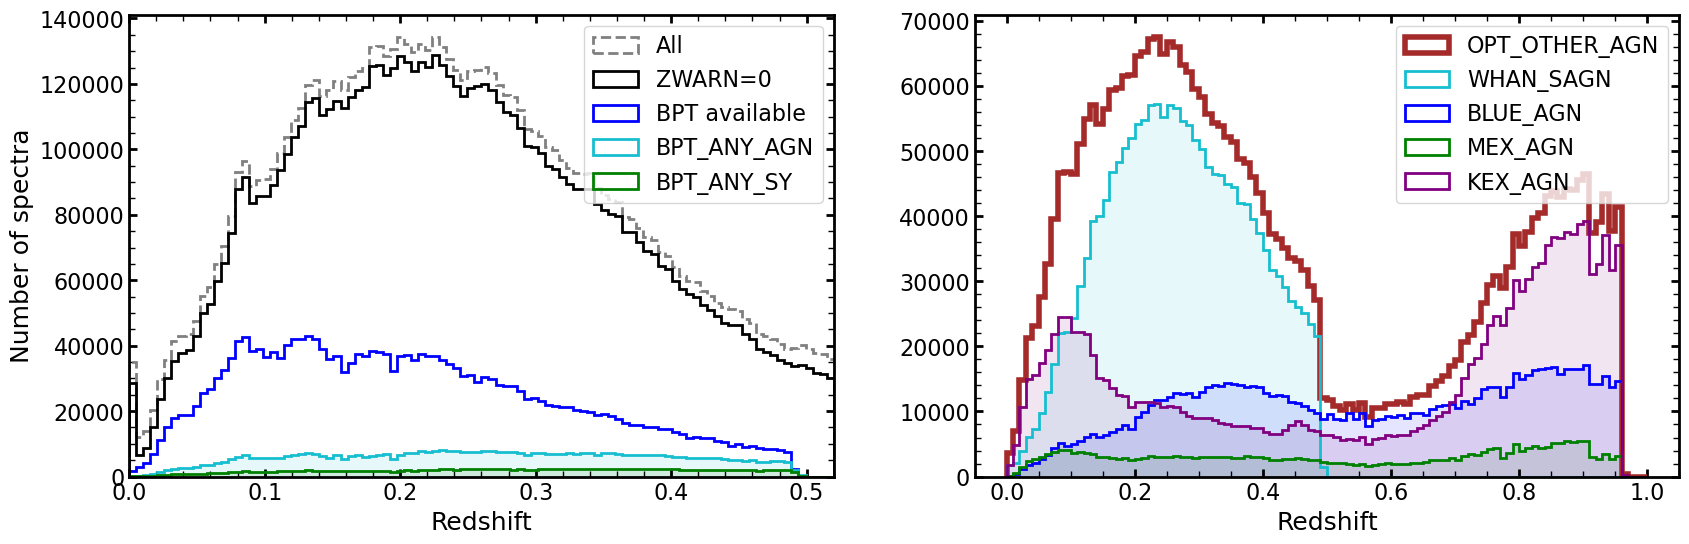

In [19]:
## To Do: add a second panel to showcase some "OTHER_OPT_UV" diagnostics so extending to z~1 or z~1.5 as appropriate

## Focusin on low-z, BPT
agntypes = ['BPT_ANY_AGN', 'BPT_ANY_SY']
colors = ['tab:cyan', 'green']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), sharex=False)

zr1 = (0,0.52)

# Left-hand panel: full catalog + only secure redshifts
ax1.hist(T['Z'],bins=100,range=zr1, histtype='step', lw=2, color='gray', ls='--', label='All')
ax1.hist(T['Z'][T['ZWARN']==0],bins=100,range=zr1, histtype='step', lw=2, color='k', label='ZWARN=0')

# Available
ax1.hist(T['Z'][(T['ZWARN']==0)&(T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_BPT != 0)],bins=100,range=zr1, histtype='step', lw=2, color='b', label='BPT available')

#selected classes of AGN/QSO
for i, agn in enumerate(agntypes):
    sel = (T['AGN_MASKBITS'] & AGN_MASKBITS[agn] != 0)
    col = colors[i]
    ax1.hist(T['Z'][sel],bins=100,range=zr1, alpha=0.1, color=col)
    ax1.hist(T['Z'][sel],bins=100,range=zr1, label=agn, histtype='step', lw=2, color=col)

ax1.set_xlim(zr1)

## Right-hand panel
zr2 = (0,1.)
optuv_types = ['WHAN_SAGN', 'BLUE_AGN', 'MEX_AGN', 'KEX_AGN']
colors = ['tab:cyan', 'blue', 'green', 'purple']

## AGN ANY
#ax2.hist(T['Z'][agnany&(T['ZWARN']==0)],bins=100,range=zr2, histtype='step', lw=2, color='red', label='AGN_ANY')

## OPT_OTHER_AGN (seems to have a bug as it only picked up WHAN and not MEx, Blue, KEx)
## Also KEx is missing entirely??
sel =  opt_other_agn 
ax2.hist(T['Z'][sel],bins=100,range=zr2, histtype='step', lw=4, color='brown', label='OPT_OTHER_AGN')

optuv_types_range = [whan_sagn, mex_agn, agn_blue, kex_agn]

#selected classes of AGN/QSO
for i, agn in enumerate(optuv_types):
    col = colors[i]
    sel = optuv_types_range[i]
    ax2.hist(T['Z'][sel],bins=100,range=zr2, alpha=0.1, color=col)
    ax2.hist(T['Z'][sel],bins=100,range=zr2, label=agn, histtype='step', lw=2, color=col)

# Legends
ax1.legend()
ax2.legend()

# Axis labels
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Number of spectra')
ax2.set_xlabel('Redshift')

plt.show()

## 3) Let's try to filter by some AGN diagnostics and plot the result.

Let's begin with the BPT plots.

To plot the BPT plots we'll need to find the logarithm of the ratios needed for the x and y axes.

In [16]:
xx_bptnii = np.log10(T2['NII_6584_FLUX']/T2['HALPHA_FLUX'])
xx_bptsii = np.log10((T2['SII_6716_FLUX']+T2['SII_6731_FLUX'])/T2['HALPHA_FLUX'])
xx_bptoi = np.log10(T2['OI_6300_FLUX']/T2['HALPHA_FLUX'])
yy_bpt = np.log10(T2['OIII_5007_FLUX']/T2['HBETA_FLUX'])

Now let's use our bitmask to filter these vectors. 

As an example let's think about how we might filter the NII BPT star-forming objects. In the AGN_TYPE bitmask the star-forming objects are defined with:

    AGN_TYPE:
    ...
    - [NII_SF,           6, "NII BPT Star-forming"]
    ...
    
Accessing the AGN_TYPE column of our table, T, is done through:

    T['AGN_TYPE']
    
This is where the numeric value associated with our binary number is stored. 
    
We filter a bitmask by identfying a bit that is flipped to a 1. 2^0=1, 2^1=10, 2^2=100, 2^3=1000...

So for example if T['AGN_TYPE'] is 11 then the binary represenation would be 1011 formed from 11 = 8+2+1 = 2^3+2^1+2^0 = 1000 + 10 + 1. 

In this case for the first 4 bitvalues we would find:

for bitnumber of 11

    is 2^0 true = 1
    is 2^1 true = 1
    is 2^2 true = 0
    is 2^3 true = 1
    
in pseudo code we could express this as

    is_0 = ( 11 & 2^0 != 0)
    is_1 = ( 11 & 2^1 != 0)
    is_2 = ( 11 & 2^2 != 0)
    is_3 = ( 11 & 2^3 != 0)
    
Now let's return to think about the case of is our 'AGN_TYPE' diagnostic NII_SF. We could write this as:    

    is_nii_sf = (T['AGN_TYPE'] & AGN_TYPE.NII_SF != 0)
    
So now let's try this below.

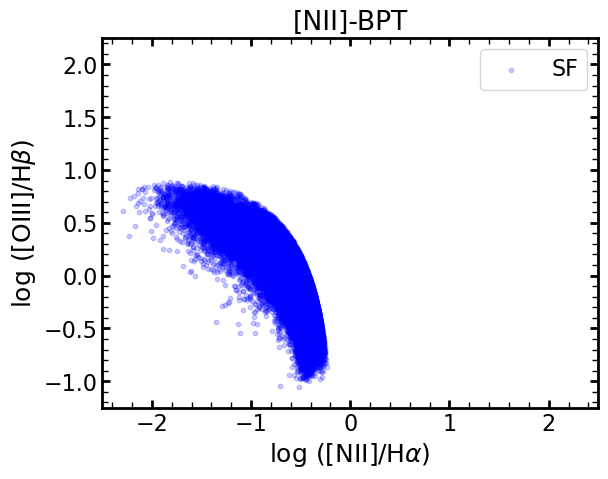

In [17]:
is_nii_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_SF != 0)

# Let's plot these filtered values
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[is_nii_sf], yy_bpt[is_nii_sf], color = 'b', s = 10, label='SF', alpha=0.2)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.xlim(-2.5,2.5)
plt.ylim(-1.25,2.25)
plt.legend()
plt.show()

Now let's try filtering and printing the NII, SII and OI BPT plot.

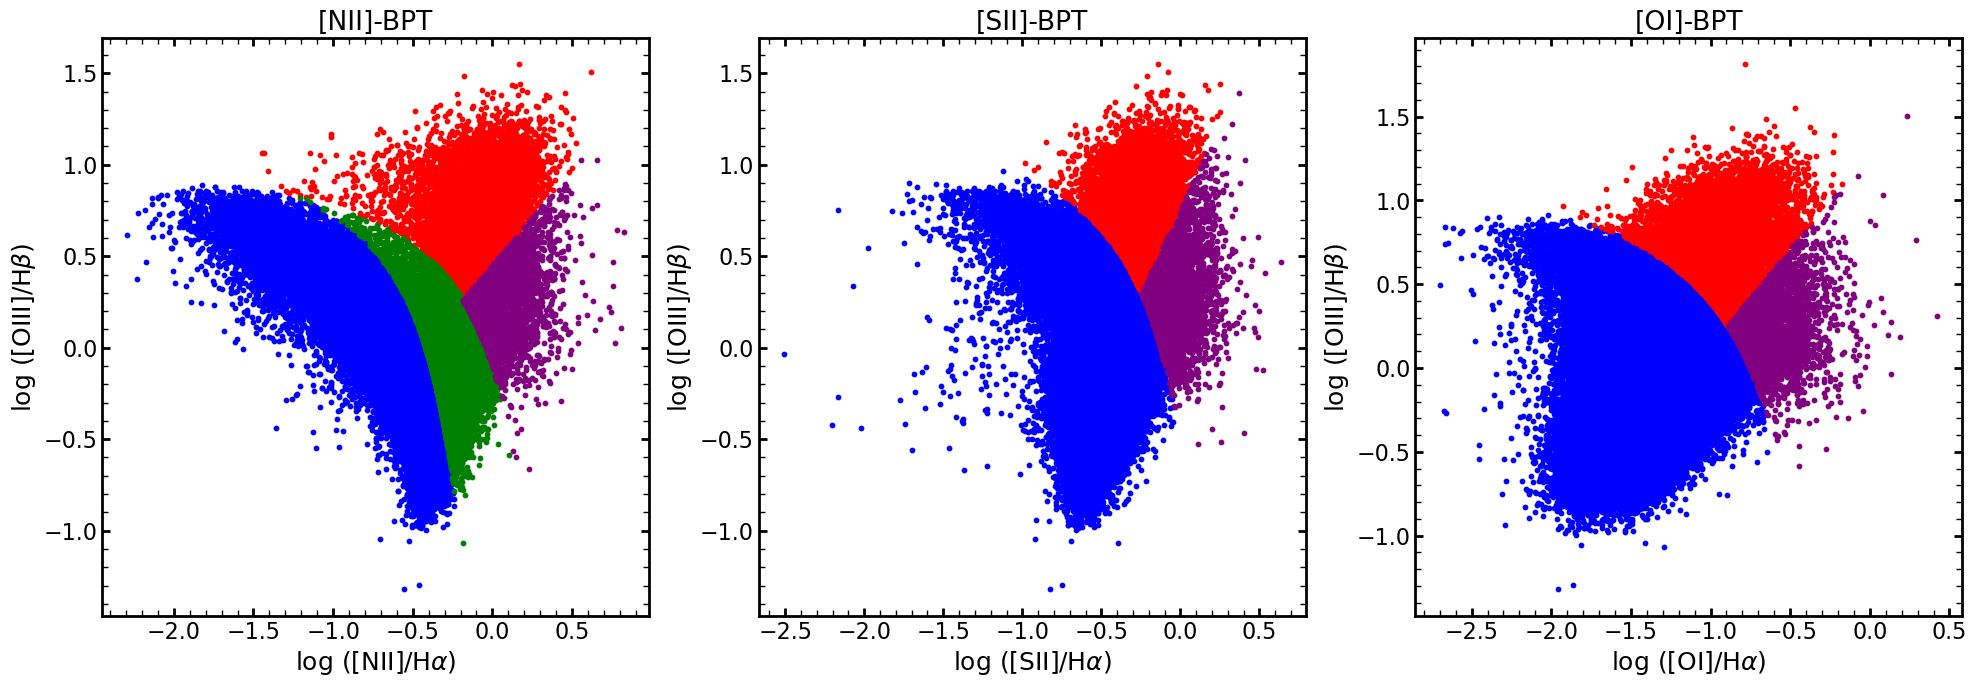

In [18]:
is_nii_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_SF != 0)
is_nii_sy = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_SY != 0)
is_nii_lin = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_LINER != 0)
is_nii_comp = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_COMP != 0)

is_sii_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.SII_SF != 0)
is_sii_sy = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.SII_SY != 0)
is_sii_lin = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.SII_LINER != 0)

is_oi_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.OI_SF != 0)
is_oi_sy = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.OI_SY != 0)
is_oi_lin = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.OI_LINER != 0)

plt.figure(figsize = (24,7.5))

plt.subplot2grid((1,3), (0,0))
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[is_nii_sf], yy_bpt[is_nii_sf], color = 'b', s = 10)
plt.scatter(xx_bptnii[is_nii_sy], yy_bpt[is_nii_sy], color = 'r', s = 10)
plt.scatter(xx_bptnii[is_nii_comp], yy_bpt[is_nii_comp], color = 'g', s = 10)
plt.scatter(xx_bptnii[is_nii_lin], yy_bpt[is_nii_lin], color = 'purple', s = 10)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,1))
plt.title('[SII]-BPT')
plt.scatter(xx_bptsii[is_sii_sf], yy_bpt[is_sii_sf], color = 'b', s = 10)
plt.scatter(xx_bptsii[is_sii_sy], yy_bpt[is_sii_sy], color = 'r', s = 10)
plt.scatter(xx_bptsii[is_sii_lin], yy_bpt[is_sii_lin], color = 'purple', s = 10)
plt.xlabel('log ([SII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,2))
plt.title('[OI]-BPT')
plt.scatter(xx_bptoi[is_oi_sf], yy_bpt[is_oi_sf], color = 'b', s = 10)
plt.scatter(xx_bptoi[is_oi_sy], yy_bpt[is_oi_sy], color = 'r', s = 10)
plt.scatter(xx_bptoi[is_oi_lin], yy_bpt[is_oi_lin], color = 'purple', s = 10)
plt.xlabel('log ([OI]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.show()

In [19]:
# AGN_MASKBITS BPT_ANY_SY BPT_ANY_AGN
mask_is_any_sy = (T['AGN_MASKBITS'] & AGN_MASKBITS.BPT_ANY_SY != 0)
mask_is_any_agn = (T['AGN_MASKBITS'] & AGN_MASKBITS.BPT_ANY_AGN != 0)

is_any_sy = (is_nii_sy | is_sii_sy | is_oi_sy)
is_any_agn = (is_nii_sy | is_sii_sy | is_oi_sy | is_nii_lin | is_sii_lin | is_oi_lin | is_nii_comp)

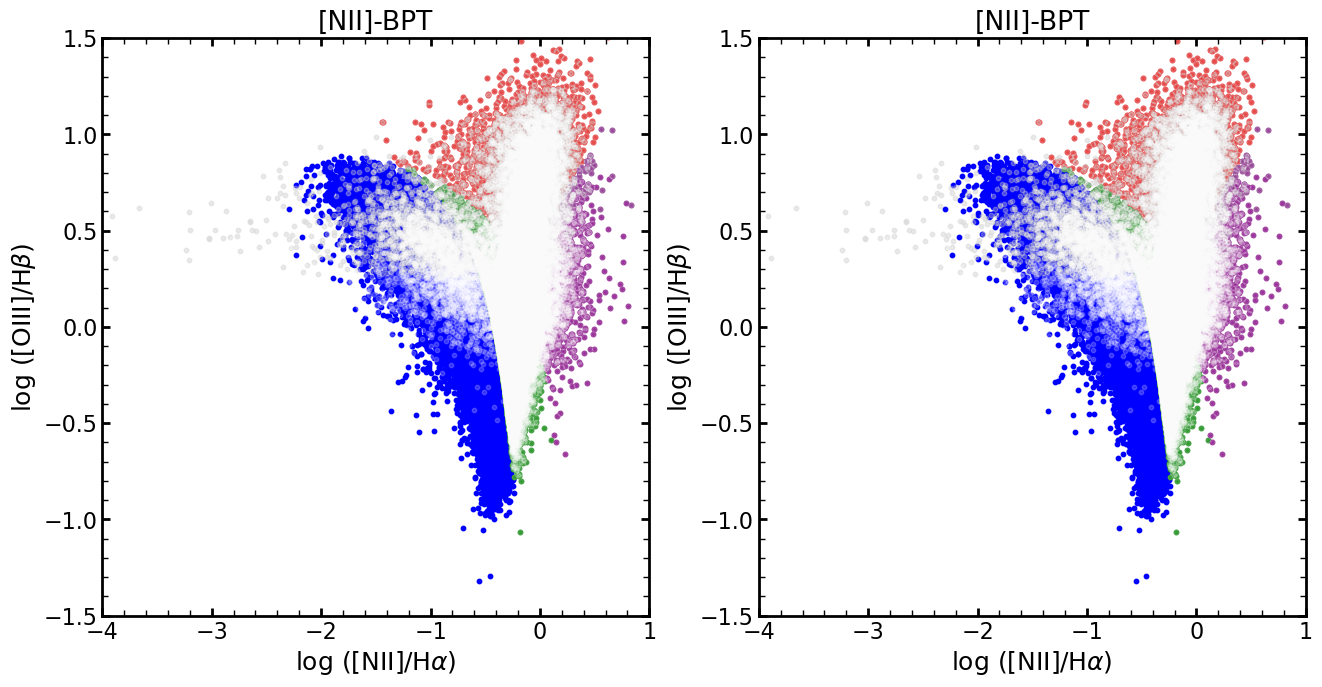

In [20]:
plt.figure(figsize = (24,7.5))

plt.subplot2grid((1,3), (0,0))
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[is_nii_sf], yy_bpt[is_nii_sf], color = 'b', s = 10)
plt.scatter(xx_bptnii[is_nii_sy], yy_bpt[is_nii_sy], color = 'r', s = 10)
plt.scatter(xx_bptnii[is_nii_comp], yy_bpt[is_nii_comp], color = 'g', s = 10)
plt.scatter(xx_bptnii[is_nii_lin], yy_bpt[is_nii_lin], color = 'purple', s = 10)

plt.scatter(xx_bptnii[mask_is_any_sy], yy_bpt[mask_is_any_sy], color = 'grey', s = 10, alpha=0.2)
plt.scatter(xx_bptnii[mask_is_any_agn], yy_bpt[mask_is_any_agn], color = 'white', s = 10, alpha=0.2)

plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.xlim(-4,1)
plt.ylim(-1.5,1.5)
#

plt.subplot2grid((1,3), (0,1))
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[is_nii_sf], yy_bpt[is_nii_sf], color = 'b', s = 10)
plt.scatter(xx_bptnii[is_nii_sy], yy_bpt[is_nii_sy], color = 'r', s = 10)
plt.scatter(xx_bptnii[is_nii_comp], yy_bpt[is_nii_comp], color = 'g', s = 10)
plt.scatter(xx_bptnii[is_nii_lin], yy_bpt[is_nii_lin], color = 'purple', s = 10)

plt.scatter(xx_bptnii[is_any_sy], yy_bpt[is_any_sy], color = 'grey', s = 10, alpha=0.2)
plt.scatter(xx_bptnii[is_any_agn], yy_bpt[is_any_agn], color = 'white', s = 10, alpha=0.2)

plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.xlim(-4,1)
plt.ylim(-1.5,1.5)


# plt.subplot2grid((1,3), (0,1))
# plt.title('[SII]-BPT')
# plt.scatter(xx_bptsii[is_sii_sf], yy_bpt[is_sii_sf], color = 'b', s = 10)
# plt.scatter(xx_bptsii[is_sii_sy], yy_bpt[is_sii_sy], color = 'r', s = 10)
# plt.scatter(xx_bptsii[is_sii_lin], yy_bpt[is_sii_lin], color = 'purple', s = 10)

# plt.scatter(xx_bptnii[is_any_sy], yy_bpt[is_any_sy], color = 'grey', s = 10, alpha=0.3)
# plt.scatter(xx_bptnii[is_any_agn], yy_bpt[is_any_agn], color = 'white', s = 10, alpha=0.3)

# plt.xlabel('log ([SII]/H$\\alpha$)')
# plt.ylabel('log ([OIII]/H$\\beta$)')

# plt.subplot2grid((1,3), (0,2))
# plt.title('[OI]-BPT')
# plt.scatter(xx_bptoi[is_oi_sf], yy_bpt[is_oi_sf], color = 'b', s = 10)
# plt.scatter(xx_bptoi[is_oi_sy], yy_bpt[is_oi_sy], color = 'r', s = 10)
# plt.scatter(xx_bptoi[is_oi_lin], yy_bpt[is_oi_lin], color = 'purple', s = 10)
# plt.xlabel('log ([OI]/H$\\alpha$)')
# plt.ylabel('log ([OIII]/H$\\beta$)')

plt.show()

### 4) What about the intersections of some AGN diagnostics.

First let's try to build a BPT where we allow the objects to be placed in the BPT if they are SY, SF or LINERS in any of the three BPT plots. This will double up on some objects.

In [21]:
is_any_sf = (is_nii_sf | is_sii_sf | is_oi_sf)
is_any_sy = (is_nii_sy | is_sii_sy | is_oi_sy)
is_any_lin = (is_nii_lin | is_sii_lin | is_oi_lin)

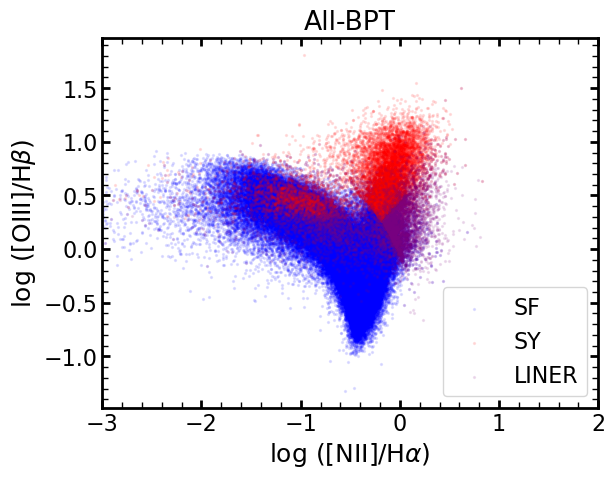

In [22]:
plt.title('All-BPT')
plt.scatter(xx_bptnii[is_any_sf], yy_bpt[is_any_sf], color = 'b', s = 2, label='SF', alpha=0.1)
plt.scatter(xx_bptnii[is_any_sy], yy_bpt[is_any_sy], color = 'r', s = 2, label='SY', alpha=0.1)
plt.scatter(xx_bptnii[is_any_lin], yy_bpt[is_any_lin], color = 'purple', s = 2, label='LINER', alpha=0.1)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.xlim(-3,2)
plt.legend()
plt.show()

Now let's try to build a BPT where we only filter the objects which are considered to be seyferts, liners and star-formings regions in all three plots at once. Let's plot this on the NII plot.

In [23]:
is_sf = (is_nii_sf & is_sii_sf & is_oi_sf)
is_sy = (is_nii_sy & is_sii_sy & is_oi_sy)
is_lin = (is_nii_lin & is_sii_lin & is_oi_lin)

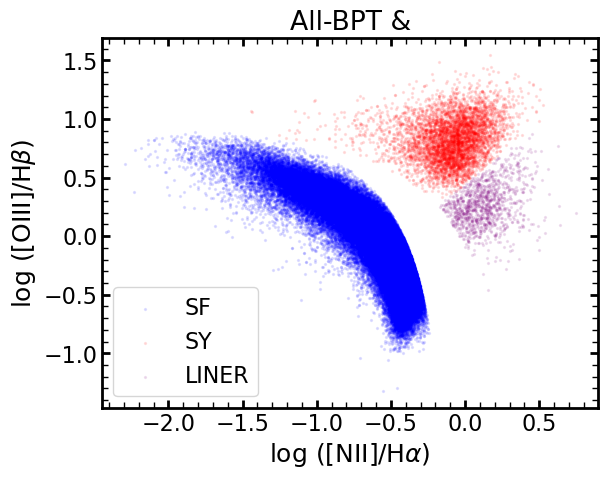

In [24]:
plt.title('All-BPT &')
plt.scatter(xx_bptnii[is_sf], yy_bpt[is_sf], color = 'b', s = 2, label='SF', alpha=0.1)
plt.scatter(xx_bptnii[is_sy], yy_bpt[is_sy], color = 'r', s = 2, label='SY', alpha=0.1)
plt.scatter(xx_bptnii[is_lin], yy_bpt[is_lin], color = 'purple', s = 2, label='LINER', alpha=0.1)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.legend()
plt.show()

Now lets try apply S/N cuts to emission lines

In [25]:
nii_sn = T2['NII_6584_FLUX']*np.sqrt(T2['NII_6584_FLUX_IVAR'])
ha_sn = T2['HALPHA_FLUX']*np.sqrt(T2['HALPHA_FLUX_IVAR'])
oiii_sn = T2['OIII_5007_FLUX']*np.sqrt(T2['OIII_5007_FLUX_IVAR'])
hb_sn = T2['HBETA_FLUX']*np.sqrt(T2['HBETA_FLUX_IVAR'])

is_sig = (nii_sn > 3) & (ha_sn > 3) & (oiii_sn > 3) & (hb_sn > 3)

In [26]:
is_wise = T['AGN_MASKBITS'] & AGN_MASKBITS.WISE_ANY_AGN !=0
is_wise_sig = is_wise & is_sig

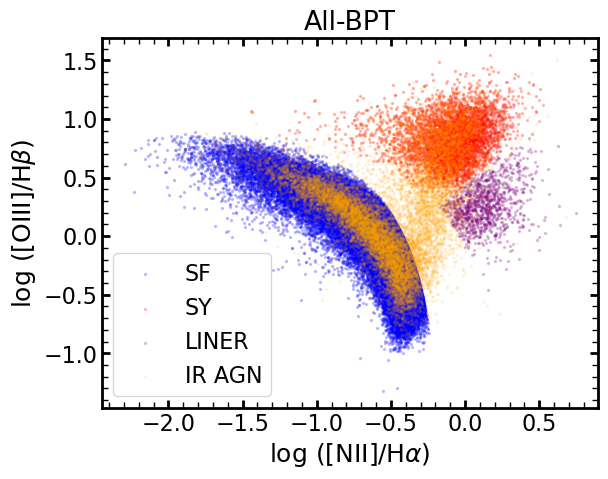

In [27]:
plt.title('All-BPT')
plt.scatter(xx_bptnii[is_sf], yy_bpt[is_sf], color = 'b', s = 2, label='SF', alpha=0.2)
plt.scatter(xx_bptnii[is_sy], yy_bpt[is_sy], color = 'r', s = 2, label='SY', alpha=0.2)
plt.scatter(xx_bptnii[is_lin], yy_bpt[is_lin], color = 'purple', s = 2, label='LINER', alpha=0.2)
plt.scatter(xx_bptnii[is_wise_sig], yy_bpt[is_wise_sig], color = 'orange', s = 2, alpha=0.1, label='IR AGN')
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.legend()
plt.show()

### 5) We can also use the AGN_diagnostics code which makes these cuts to plot diagnostic lines. 

In [28]:
from AGNdiagnosticsFunctionsDESI import NII_BPT_lines

In [29]:
print(NII_BPT_lines.__doc__)


    This function draws the lines for the BPT regions int he NII_BPT plot
    
    Kewley et al. 2001: starburst vs AGN classification.
    Kew01_nii: log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.47)+1.19

    Kauffmann et al. 2003: starburst vs composites.
    Ka03: log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.05)+1.3
    
    Schawinsky et al. 2007: Seyferts vs LINERS
    Scha07: log10(flux_oiii_5006/flux_hbeta)=1.05*log10(flux_nii_6583/flux_halpha)+0.45
    
    Other BPT regions not implemented here yet:
    
    Law et al. 2021 proposed revised lines based on MaNGA observation (not implemented b/c similar to Ka03):
    log10(flux_oiii_5006/flux_hbeta)=0.438/(log10(flux_nii_6583/flux_halpha)+0.023)+1.222
    
    Law et al. define an extra "intermediate" region (not yet implemented)
    


In [30]:
x_axes=np.linspace(-3,2,70)
Kew01_nii, Ka03, Scha07 = NII_BPT_lines(x_axes)

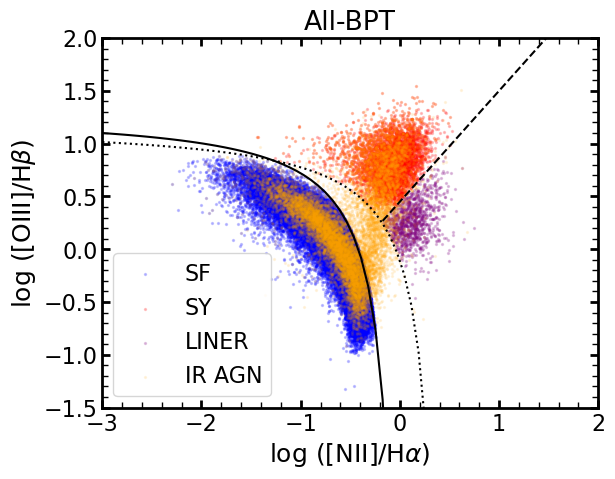

In [31]:
plt.title('All-BPT')

plt.plot(x_axes,Kew01_nii, color='black', ls=':')
plt.plot(x_axes,Scha07, color='black', ls='--')
plt.plot(x_axes,Ka03, color='black', ls='-')

plt.scatter(xx_bptnii[is_sf], yy_bpt[is_sf], color = 'b', s = 2, label='SF', alpha=0.2)
plt.scatter(xx_bptnii[is_sy], yy_bpt[is_sy], color = 'r', s = 2, label='SY', alpha=0.2)
plt.scatter(xx_bptnii[is_lin], yy_bpt[is_lin], color = 'purple', s = 2, label='LINER', alpha=0.2)
plt.scatter(xx_bptnii[is_wise_sig], yy_bpt[is_wise_sig], color = 'orange', s = 2, alpha=0.1, label='IR AGN')
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')
plt.xlim(-3,2)
plt.ylim(-1.5,2)
plt.legend()
plt.show()

### 6) Let's plot all the diagnostics we have

The NII, SII and OI BPT are extensively plotted above. 

The other optical and UV diagnostics are:

1. HeII_BPT
2. WHAN
3. Blue diagram
4. NeV
5. MeX
6. KeX

Let's try these in order below.

#### 1) HeII BPT diagnostic

In [12]:
xx_bptnii = np.log10(T2['NII_6584_FLUX']/T2['HALPHA_FLUX'])
yy_bptheii = np.log10(T2['HEII_4686_FLUX']/T2['HBETA_FLUX'])

In [13]:
is_heii = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.HEII_BPT != 0)
is_heii_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.HEII_SF != 0)
is_heii_agn = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.HEII_AGN != 0)

In [14]:
# log10(flux_heii_4685/flux_hbeta)=-1.22+1/(8.92*log10(flux_nii_6583/flux_halpha)+1.32)
x_heiiline = np.linspace(-3,-1.32/8.92,70)
y_heiiline = -1.22+1/(8.92*x_heiiline+1.32)

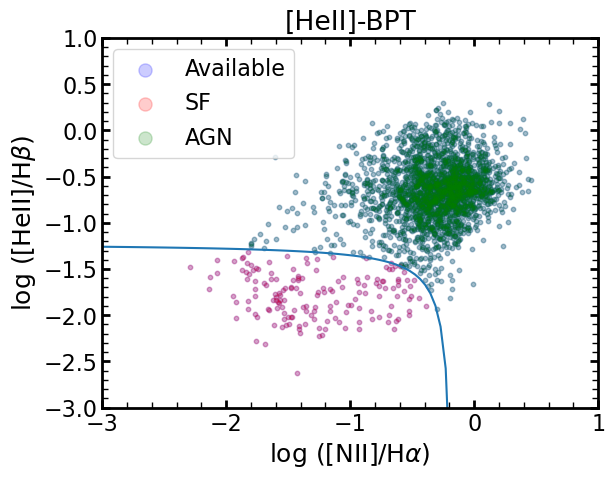

In [15]:
plt.title('[HeII]-BPT')
plt.scatter(xx_bptnii[is_heii], yy_bptheii[is_heii], color = 'b', s = 10, label='Available', alpha=0.2)
plt.scatter(xx_bptnii[is_heii_sf], yy_bptheii[is_heii_sf], color = 'r', s = 10, label='SF', alpha=0.2)
plt.scatter(xx_bptnii[is_heii_agn], yy_bptheii[is_heii_agn], color = 'g', s = 10, label='AGN', alpha=0.2)
plt.plot(x_heiiline, y_heiiline)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([HeII]/H$\\beta$)')
plt.xlim(-3, 1)
plt.ylim(-3, 1)
plt.legend(markerscale=3)
plt.show()

#### 2) WHAN

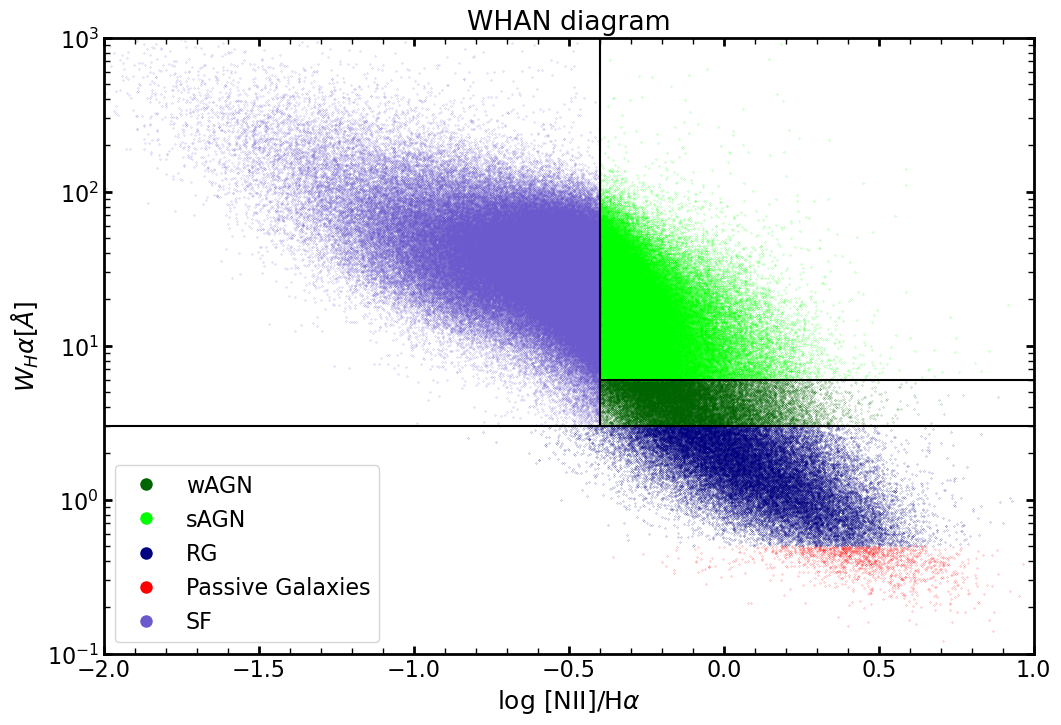

In [40]:
from matplotlib.lines import Line2D
#we define the masks required for the classification of AGNs for the WHAN BPT diagram
is_whan_av = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN !=0)
#creating the subcatalog for the objects for which the WHAN is available
T_WHAN = T[is_whan_av]
T2_WHAN = T2[is_whan_av]
xx_bptwhan=np.log10((T2_WHAN['NII_6584_FLUX']/T2_WHAN['HALPHA_FLUX'])) 
yy_Wha = T2_WHAN['HALPHA_EW'] #getting the width of H-alpha line
#creating the masks for different WHAN objects
is_whan_sf = (T_WHAN['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN_SF !=0)  #Star forming galaxies mask
is_whan_sagn = (T_WHAN['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN_SAGN != 0) #strong AGN mask
is_whan_wagn = (T_WHAN['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN_WAGN != 0) #weak AGN mask
is_whan_ret = (T_WHAN['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN_RET !=0) #retired galaxies mask
is_whan_pass = (T_WHAN['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN_PASS !=0) #passive galaxies mask
size = 0.02 #modify according to the choice of points in the scatter plot
#initializing the figure properties
plt.figure(figsize=(12,8))
plt.title('WHAN diagram')
#creating the WHAN BPT diagram
plt.scatter(xx_bptwhan[is_whan_wagn], yy_Wha[is_whan_wagn], color='darkgreen', s=size, label='wAGN')
plt.scatter(xx_bptwhan[is_whan_sagn], yy_Wha[is_whan_sagn], color = 'lime', s=size, label='sAGN')
plt.scatter(xx_bptwhan[is_whan_ret], yy_Wha[is_whan_ret], color= 'navy', s=size, label='RG')
plt.scatter(xx_bptwhan[is_whan_pass], yy_Wha[is_whan_pass], color = 'r', s=size, label='Passive Galaxies')
plt.scatter(xx_bptwhan[is_whan_sf], yy_Wha[is_whan_sf], color = 'slateblue', s=size, label='SF')
#defining the theoretical cuts for different objects
x_cutoff_SF = -0.4 #star forming WHAN cutoff criteria
plt.plot([x_cutoff_SF, x_cutoff_SF], [3, 10**3], color='black')
y_cutoff_sAGN = 6 #strong AGN WHAN cutoff criteria
plt.plot([-0.4, 1], [y_cutoff_sAGN, y_cutoff_sAGN], color='black')
plt.axhline(y=3, color='black') #criteria for the retired galaxies, also referred to as the fake AGNs
plt.xlabel('log [NII]/H$\\alpha$') 
plt.ylabel('$W_H\\alpha [{\AA}]$')
plt.yscale('log')
#defining the limits of the plot
plt.xlim(-2, 1)
plt.ylim(0.1, 10**3)
#defining the legends of the scatter plot separately for better visualization
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='wAGN', markerfacecolor='darkgreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='sAGN', markerfacecolor='lime', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='RG', markerfacecolor='navy', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Passive Galaxies', markerfacecolor='r', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='SF', markerfacecolor='slateblue', markersize=10)
]
# Customize legend with larger markers
plt.legend(handles=legend_elements, loc='best')

#### 3) Blue diagram

In [41]:
# Create masks for each of the Blue diagnostic subsets
blue_av_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE != 0 
blue_agn_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE_AGN != 0
blue_slc_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE_SLC != 0
blue_liner_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE_LINER != 0
blue_sf_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE_SF != 0
blue_sfagn_mask = T['OPT_UV_TYPE'] & OPT_UV_TYPE.BLUE_SFAGN != 0

In [43]:
# Set our plotting data axes
xx_blue = np.log10(T2['OII_3726_EW'] / T2['HBETA_EW'])
yy_blue = np.log10(T2['OIII_5007_FLUX'] / T2['HBETA_FLUX'])

In [44]:
# lines
xx_blue_main_lines = np.linspace(-2., 0.9, num=200)
xx_blue_slc_lines = np.linspace(0.09, 1.06)
blue_main_line = 0.11 / (xx_blue_main_lines - 0.92) + 0.85
blue_eq3a = -(xx_blue_slc_lines - 1.)**2 - 0.1 * xx_blue_slc_lines + 0.25
blue_eq3b = (xx_blue_slc_lines - 0.2)**2 - 0.6

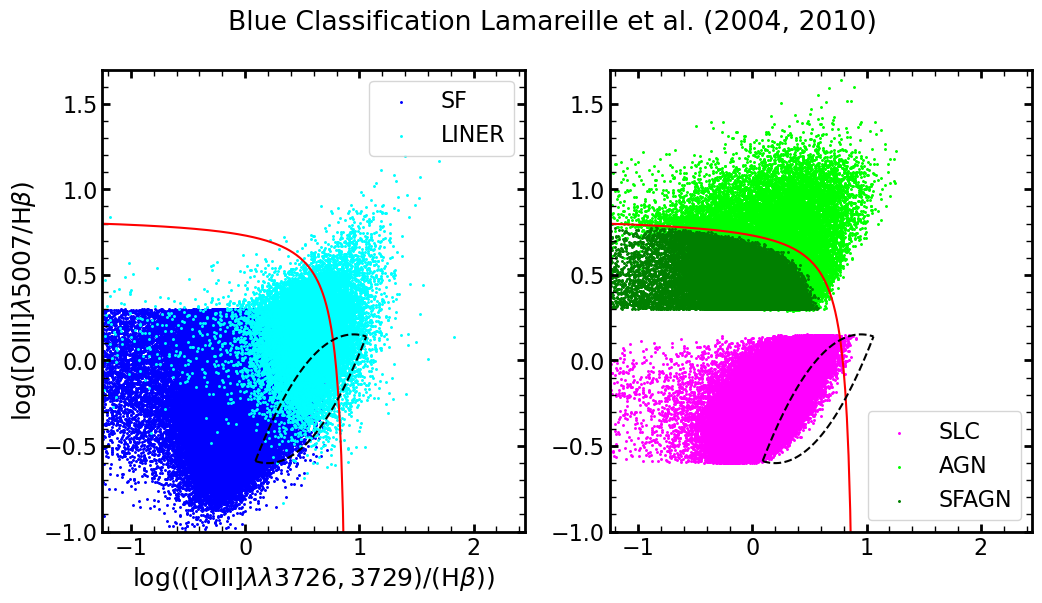

In [45]:
fig, (ax, bx) = plt.subplots(ncols=2, figsize=(12, 6))
ax.scatter(xx_blue[blue_sf_mask], yy_blue[blue_sf_mask], marker='.', s=5, color='blue', label='SF')
ax.scatter(xx_blue[blue_liner_mask], yy_blue[blue_liner_mask], marker='.', s=5, color='cyan', label='LINER')
ax.plot(xx_blue_main_lines, blue_main_line, color='r')
ax.plot(xx_blue_slc_lines, blue_eq3a, color='k', ls='--')
ax.plot(xx_blue_slc_lines, blue_eq3b, color='k', ls='--')

bx.scatter(xx_blue[blue_slc_mask], yy_blue[blue_slc_mask], marker='.', s=5, color='magenta', label='SLC')
bx.scatter(xx_blue[blue_agn_mask], yy_blue[blue_agn_mask], marker='.', s=5, color='lime', label='AGN')
bx.scatter(xx_blue[blue_sfagn_mask], yy_blue[blue_sfagn_mask], marker='.', s=5, color='green', label='SFAGN')
bx.plot(xx_blue_main_lines, blue_main_line, color='r')
bx.plot(xx_blue_slc_lines, blue_eq3a, color='k', ls='--')
bx.plot(xx_blue_slc_lines, blue_eq3b, color='k', ls='--')

ax.legend()
ax.set(xlabel=r'$\log(([\mathrm{OII}]\lambda\lambda 3726,3729) / (\mathrm{H}\beta))$',
       ylabel=r'$\log([\mathrm{OIII}]\lambda 5007 / \mathrm{H}\beta)$',
       xlim=[-1.25, 2.45], ylim=[-1., 1.7])
bx.legend()
bx.set(xlim=[-1.25, 2.45], ylim=[-1., 1.7])

fig.suptitle('Blue Classification Lamareille et al. (2004, 2010)')
# plt.axis('scaled')
plt.show()

#### 4) NeV

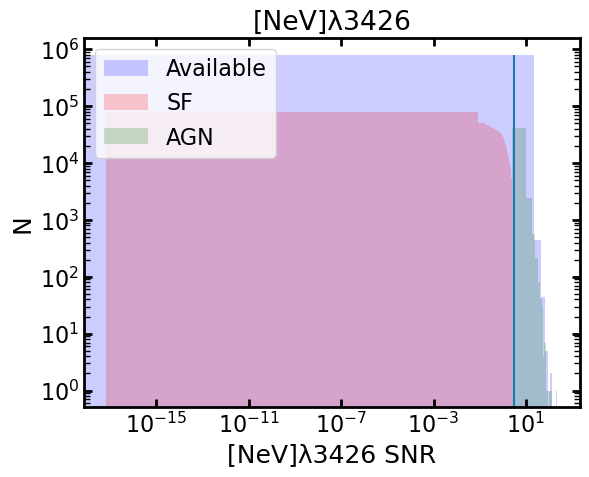

In [37]:
snr_nev = T2['NEV_3426_FLUX']*np.sqrt(T2['NEV_3426_FLUX_IVAR'])
is_nev = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NEV != 0)
is_nev_sf = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NEV_SF != 0)
is_nev_agn = (T['OPT_UV_TYPE'] & OPT_UV_TYPE.NEV_AGN != 0)
plt.title('[NeV]λ3426')
n, _, _ = plt.hist(snr_nev[is_nev], color = 'b', label='Available', alpha=0.2)
plt.hist(snr_nev[is_nev_sf], color = 'r', label='SF', alpha=0.2, bins=30)
plt.hist(snr_nev[is_nev_agn], color = 'g', label='AGN', alpha=0.2, bins=30)
plt.vlines(3, 0, max(n))
plt.xlabel('[NeV]λ3426 SNR')
plt.ylabel('N')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show() 

#### 5) MEx

#### 6) KEx